In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
x_train = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

shape = x_train.shape
length = shape[0]

print(f"Shape of the training data: {shape}")
print(f"Length of the data: {length}")

Shape of the training data: (200, 2)
Length of the data: 200


In [5]:
K = 5

In [6]:
max_iterations = 1000
tolerance = 1e-3

In [7]:
def plot_kmeans(x_data, centroids, clusters=None, title='K-Means Clustering'):
    colors = ['r', 'g', 'b', 'c', 'm']
    
    # Plot data points
    if clusters is not None:
        for j in range(len(centroids)):
            plt.scatter(
                x_data[clusters == j, 0],
                x_data[clusters == j, 1],
                s=50,
                color=colors[j % len(colors)],
                label=f'Cluster {j}'
            )
    else:
        plt.scatter(x_data[:, 0], x_data[:, 1], s=50, color='blue', label='Data points')
    
    # Plot centroids
    plt.scatter(
        centroids[:, 0],
        centroids[:, 1],
        s=200,
        color='yellow',
        marker='*',
        label='Centroids'
    )
    
    # Set labels and title
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.title(title)
    plt.legend()
    plt.show()

In [ ]:
centroids = np.array([
	[20, 80],
	[90, 20],
	[50, 50],
	[120, 80],
	[30, 20]
])

New Better Initial Centroids: [[ 20  80]
 [ 90  20]
 [ 50  50]
 [120  80]
 [ 30  20]]


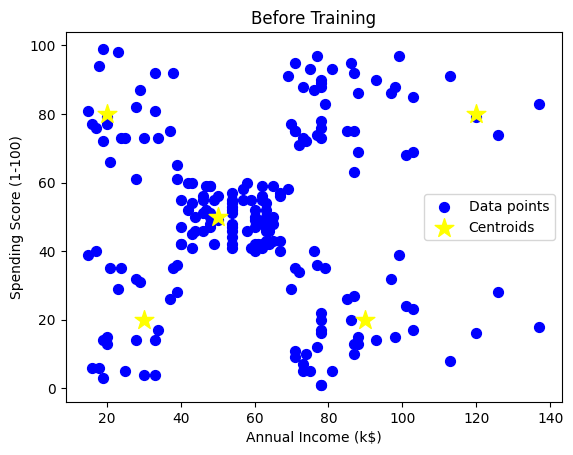

In [16]:
plot_kmeans(x_train, centroids, title='Before Training')

In [17]:
def distance(a, b):
	return np.sqrt(np.sum((a - b) ** 2))

In [18]:
for index in range(max_iterations):
	clusters = []
	for x in x_train:
		distances = [distance(x, centroid) for centroid in centroids]
		closest_cluster = np.argmin(distances)
		clusters.append(closest_cluster)
	clusters = np.array(clusters)

	new_centroids = []
	for j in range(K):
		cluster_points = x_train[clusters == j]
		if len(cluster_points) > 0:
			new_centroid = cluster_points.mean(axis=0)
		else:
			new_centroid = centroids[j]
		new_centroids.append(new_centroid)
	new_centroids = np.array(new_centroids)

	if np.all(np.abs(new_centroids - centroids) < tolerance):
		break

	centroids = new_centroids

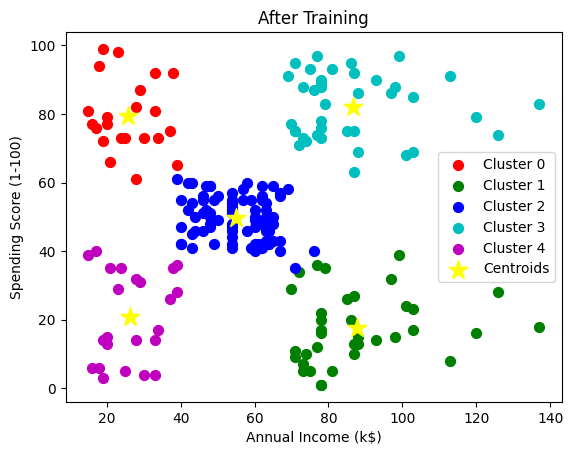

In [ ]:
plot_kmeans(x_train, centroids, clusters, title='After Training')

In [20]:
print("Final Centroids:")
print(centroids)

Final Centroids:
[[25.72727273 79.36363636]
 [87.75       17.58333333]
 [55.0875     49.7125    ]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]]
